# Credit Card Fraud Detection Dataset Overview

## Introduction
Credit card fraud detection is a critical problem in the finance industry. Fraudulent transactions can cause significant financial losses and undermine customer trust. In this project, we develop a machine learning model to detect fraudulent credit card transactions using a dataset of anonymised transactions.
## Dataset Summary
 Total Rows: 100,000
 Total Features: 21 (including the target variable)
 Purpose: The dataset is designed for credit risk assessment, specifically to predict whether a
borrower will default on a loan based on their financial and personal information.
### 1. Dataset Composition
The dataset includes 20 independent variables (features) and 1 target variable (default).These features can be categorized into three main groups:
#### 1. Personal & Demographic Information –
Age, employment status, education level, home ownership, marital status, number of dependents.
#### 2. Financial Features – 
Income, loan amount, loan term, interest rate, debt-to-income ratio, monthly expenses, annual savings, retirement savings.
#### 3. Credit History Features –
Credit score, credit history length, number of credit lines, late payments, bankruptcies.Target Variable (default)
##### 3 Binary Variable:
o 0 = Loan was repaid successfully (No Default).
o 1 = Borrower failed to repay the loan (Default).
 The dataset is balanced, with approximately 50% defaults and 50% non-defaults.
### 2. Features (Independent Variables)
Demographic Features
#### 1. age (integer, 21–65 years)- 
Age of the borrower. Older individuals may have a longer credit history, impacting risk assessment.
#### 2. num_of_dependents (integer, 0–4)- 
Number of dependents (e.g., children, spouse, elderly parents). More dependents can impact financial stability.
#### 3. education_level (categorical: "high_school", "bachelor", "master", "phd") -
Highest level of education attained. Higher education may be correlated with higher income and financial stability.
#### 4. marital_status (categorical: "single", "married", "divorced") - 
Marital status of the borrower. Married individuals may have joint income but also higher expenses.Financial Features
#### 5. income (integer, $20,000–$100,000)- 
Annual income of the borrower. Higher income generally reduces the risk of default.
#### 6. loan_amount (integer, $1,000–$50,000)-
Amount of money borrowed. Larger loans may carry a higher risk of default."Believe you can and you're halfway there."
Trainer: Mouna N from Learnbay
#### 7. loan_term (categorical: 12, 24, 36, 48, 60 months)- 
Duration of the loan in months.Longer terms may increase risk due to financial uncertainty.
#### 8. interest_rate (float, 3.5%–15.0%)-
Annual interest rate on the loan. Higher rates increase repayment burden.
#### 9. debt_to_income_ratio (float, 10%–50%)-
Ratio of total debt payments to income. Higher values indicate financial stress.
#### 10. home_ownership (categorical: "own", "rent", "mortgage")-
Indicates whether the borrower owns a home, rents, or has a mortgage. Homeowners may have more financial stability.Credit History Features
#### 11. credit_score (integer, 300–850)- 
Numerical representation of the individual's creditworthiness.Higher scores indicate lower risk.
#### 12. credit_history_length (integer, 1–30 years)- 
Number of years the borrower has had a credit history. Longer history generally means better creditworthiness.
#### 13. num_credit_lines (integer, 1–20)- 
Number of active credit lines (e.g., credit cards, loans). Too many or too few can be risky.
#### 14. late_payments (integer, 0–9)-
Number of late payments in the borrower's credit history. More late payments increase default risk.
#### 15. bankruptcies (integer, 0–2)-
Number of past bankruptcies. Even a single bankruptcy significantly increases the risk of default.Savings & Expense Features
#### 16. annual_savings (integer, $500–$50,000)- 
Amount saved annually. Higher savings indicate financial stability.
#### 17. retirement_savings (integer, $1,000–$200,000)- 
Money saved for retirement. Indicates longterm financial planning.
#### 18. monthly_expenses (integer, $500–$10,000)- 
Total monthly expenses. Higher expenses relative to income may increase risk.Employment Features
#### 19. employment_status (categorical: "employed", "unemployed", "self-employed")
 Employment status of the borrower.
 Employed: Steady income source, lower risk.
 Unemployed: No stable income, high risk.
 Self-employed: Variable income, moderate risk.
### 3. Dataset Challenges & Opportunities
####  Predictive Modeling:
Can be used to train machine learning models to classify borrowers as high or low risk.
####  Feature Engineering: 
some categorical variables (like employment status and education level) need to be encoded for machine learning models.
####  Handling Class Imbalance: 
The dataset is already balanced, which simplifies model training.
####  Financial Decision-Making:
Useful for lenders to assess borrower risk and make informed lending decisions.
### 4. Use Cases
####  Loan Approval Systems:
Automate decision-making based on borrower risk.
####  Credit Score Modeling:
Identify key factors that impact loan defaults.
####  Customer Segmentation:
Classify borrowers into risk groups for personalized financial products.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")



In [3]:
file_path = r"C:/Users/soura/Downloads/Credit Card Fraud Detection.csv"
df = pd.read_csv(file_path)
df.head()


,age,income,loan_amount,credit_score,employment_status,default(y),loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,education_level,home_ownership,marital_status,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
0,38,71440,27069,689,self-employed,1,36,9.937874,31.046101,0,high_school,rent,married,7,6,1,1,25259,195208,6037
1,36,90200,14895,578,employed,0,48,13.624882,21.845252,0,high_school,own,married,11,16,8,0,40761,152999,4064
2,47,85896,2613,352,employed,1,12,6.676366,12.562405,1,bachelor,mortgage,divorced,24,2,2,0,34857,67487,2848
3,38,20121,3163,622,unemployed,0,48,12.833366,17.144545,1,master,own,married,12,4,6,1,16048,98869,7721
4,44,77529,37731,615,self-employed,0,12,4.111636,35.892430,3,high_school,own,single,27,7,5,0,5668,42397,8009


In [4]:
# Step 1: Data Exploration
print(df.info())
print(df.head())
print(df.describe())
print("Missing values:")
print(df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    100000 non-null  int64  
 1   income                 100000 non-null  int64  
 2   loan_amount            100000 non-null  int64  
 3   credit_score           100000 non-null  int64  
 4   employment_status      100000 non-null  object 
 5   default(y)             100000 non-null  int64  
 6   loan_term              100000 non-null  int64  
 7   interest_rate          100000 non-null  float64
 8   debt_to_income_ratio   100000 non-null  float64
 9   num_of_dependents      100000 non-null  int64  
 10  education_level        100000 non-null  object 
 11  home_ownership         100000 non-null  object 
 12  marital_status         100000 non-null  object 
 13  credit_history_length  100000 non-null  int64  
 14  num_credit_lines       100000 non-nul

In [5]:
# Step 2: Data Cleaning
# Remove duplicates
df = df.drop_duplicates()


In [10]:
# Handling categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [11]:
# Handling outliers using IQR
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]


In [15]:
# Step 3: Feature Selection
if 'default(y)' in df.columns:
    X = df.drop(columns=['default(y)'])  # Features
    y = df['default(y)']  # Target variable
    
    # Ensure target variable is binary
    y = y.astype(int)
else:
    raise KeyError("Target column 'default(y)' not found in the dataset")


In [13]:
# Step 4: Data Preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [14]:
# Step 5: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Step 6: Train Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC()
}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy Score for {name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}")



Training Logistic Regression...
Accuracy Score for Logistic Regression: 0.5011
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48      9490
           1       0.50      0.54      0.52      9522

    accuracy                           0.50     19012
   macro avg       0.50      0.50      0.50     19012
weighted avg       0.50      0.50      0.50     19012

Confusion Matrix for Logistic Regression:
[[4429 5061]
 [4425 5097]]

Training Random Forest...
Accuracy Score for Random Forest: 0.4986
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      9490
           1       0.50      0.46      0.48      9522

    accuracy                           0.50     19012
   macro avg       0.50      0.50      0.50     19012
weighted avg       0.50      0.50      0.50     19012

Confusion Matrix for Random Forest:
[[508

In [18]:
# Step 6: Train Machine Learning Models with Hyperparameter Tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', C=1, gamma='scale')
}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy Score for {name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}")

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f"Improved Accuracy Score for Random Forest: {accuracy_score(y_test, y_pred_best_rf):.4f}")




Training Logistic Regression...
Accuracy Score for Logistic Regression: 0.5011
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48      9490
           1       0.50      0.54      0.52      9522

    accuracy                           0.50     19012
   macro avg       0.50      0.50      0.50     19012
weighted avg       0.50      0.50      0.50     19012

Confusion Matrix for Logistic Regression:
[[4429 5061]
 [4425 5097]]

Training Random Forest...
Accuracy Score for Random Forest: 0.5000
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      9490
           1       0.50      0.50      0.50      9522

    accuracy                           0.50     19012
   macro avg       0.50      0.50      0.50     19012
weighted avg       0.50      0.50      0.50     19012

Confusion Matrix for Random Forest:
[[475

NameError: name 'GridSearchCV' is not defined

In [1]:
# Step 7: Re-import necessary libraries for PCA + Scaling for KNN Optimization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:/Users/soura/Downloads/Credit Card Fraud Detection.csv"
df = pd.read_csv(file_path)

# Identify categorical and numerical features
cat_features = ['employment_status', 'education_level', 'home_ownership', 'marital_status', 'loan_term']
num_features = ['age', 'num_of_dependents', 'income', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 
                'credit_score', 'credit_history_length', 'num_credit_lines', 'late_payments', 'bankruptcies', 
                'annual_savings', 'retirement_savings', 'monthly_expenses']

# Step 1: Outlier Removal Using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, num_features)

# Step 2: Encoding Categorical Features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df_cleaned[cat_features])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_features))

# Drop original categorical columns and concatenate encoded features
df_encoded = df_cleaned.drop(columns=cat_features).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Step 3: Define Features (X) and Target Variable (y)
X = df_encoded.drop(columns=['default(y)'])
y = df_encoded['default(y)']

# Step 4: Split Data for Training (Before Applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Apply SMOTE only on Training Data
smote = SMOTE(random_state=42)  # Let SMOTE decide the best ratio
 # Increased SMOTE effect
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Feature Selection using SelectFromModel (Random Forest-based)
selector = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42), threshold="median")
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Step 7: Apply Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Step 8: Apply PCA for Dimensionality Reduction (Keep 95% Variance)
pca = PCA(n_components=0.95, random_state=42)  # Retains 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 9: Define Hyperparameter Grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Step 10: Train KNN with RandomizedSearchCV
knn_model = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn_model, param_distributions=param_grid, 
                                   cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_train_pca, y_train_resampled)

# Step 11: Evaluate Best KNN Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best KNN Parameters: {random_search.best_params_}")
print(f"KNN Accuracy after PCA & Scaling: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))



Best KNN Parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean'}
KNN Accuracy after PCA & Scaling: 49.83%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      9490
           1       0.50      0.49      0.50      9522

    accuracy                           0.50     19012
   macro avg       0.50      0.50      0.50     19012
weighted avg       0.50      0.50      0.50     19012



In [2]:
# Step 8: Re-import necessary libraries for Logistic Regression Optimization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
file_path =  r"C:/Users/soura/Downloads/Credit Card Fraud Detection.csv"
df = pd.read_csv(file_path)

# Identify categorical and numerical features
cat_features = ['employment_status', 'education_level', 'home_ownership', 'marital_status', 'loan_term']
num_features = ['age', 'num_of_dependents', 'income', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 
                'credit_score', 'credit_history_length', 'num_credit_lines', 'late_payments', 'bankruptcies', 
                'annual_savings', 'retirement_savings', 'monthly_expenses']

# Step 1: Outlier Removal Using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, num_features)

# Step 2: Encoding Categorical Features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df_cleaned[cat_features])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_features))

# Drop original categorical columns and concatenate encoded features
df_encoded = df_cleaned.drop(columns=cat_features).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Step 3: Define Features (X) and Target Variable (y)
X = df_encoded.drop(columns=['default(y)'])
y = df_encoded['default(y)']

# Step 4: Split Data for Training (Before Applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Apply SMOTE only on Training Data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Feature Selection using SelectFromModel (Random Forest-based)
selector = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42), threshold="median")
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Step 7: Define Hyperparameter Grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 50, 100],  # Control Regularization
    'penalty': ['l2'],  # Regularization Type
    'solver': ['liblinear', 'lbfgs']  # Solvers suitable for small datasets
}

# Step 8: Train Logistic Regression with RandomizedSearchCV
logistic_model = LogisticRegression(random_state=42, max_iter=10000, solver='saga')

random_search = RandomizedSearchCV(logistic_model, param_distributions=param_grid, 
                                   cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_train_selected, y_train_resampled)

# Step 9: Evaluate Best Logistic Regression Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Logistic Regression Parameters: {random_search.best_params_}")
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
Logistic Regression Accuracy: 49.53%
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49      9490
           1       0.50      0.51      0.51      9522

    accuracy                           0.50     19012
   macro avg       0.50      0.50      0.50     19012
weighted avg       0.50      0.50      0.50     19012



In [3]:
# Step 9:Re-import necessary libraries for Random Forest Optimization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:/Users/soura/Downloads/Credit Card Fraud Detection.csv"
df = pd.read_csv(file_path)

# Identify categorical and numerical features
cat_features = ['employment_status', 'education_level', 'home_ownership', 'marital_status', 'loan_term']
num_features = ['age', 'num_of_dependents', 'income', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 
                'credit_score', 'credit_history_length', 'num_credit_lines', 'late_payments', 'bankruptcies', 
                'annual_savings', 'retirement_savings', 'monthly_expenses']

# Step 1: Outlier Removal Using IQR (Only for Numerical Features)
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, num_features)

# Step 2: Encoding Categorical Features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df_cleaned[cat_features])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_features))

# Drop original categorical columns and concatenate encoded features
df_encoded = df_cleaned.drop(columns=cat_features).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Step 3: Define Features (X) and Target Variable (y)
X = df_encoded.drop(columns=['default(y)'])
y = df_encoded['default(y)']

# Step 4: Split Data for Training (Before Applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Apply SMOTE only if classes are imbalanced
class_counts = y_train.value_counts()
imbalance_ratio = min(class_counts) / max(class_counts)

if imbalance_ratio < 0.8:  # Apply SMOTE only if imbalance exists
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("SMOTE applied to balance classes.")
else:
    X_train_resampled, y_train_resampled = X_train, y_train  # No resampling needed
    print("SMOTE not applied (classes already balanced).")

# Step 6: Feature Selection using Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)
X_train_selected = rfe_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = rfe_selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[rfe_selector.support_]
print(f"Selected Features: {selected_features}")

# Step 7: Define Hyperparameter Grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples required for split
    'min_samples_leaf': [1, 2, 4],  # Min samples in a leaf node
    'bootstrap': [True, False]  # Use bootstrapping or not
}

# Step 8: Train Random Forest with RandomizedSearchCV
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, 
                                   cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_train_selected, y_train_resampled)

# Step 9: Evaluate Best Random Forest Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Random Forest Parameters: {random_search.best_params_}")
print(f"Random Forest Accuracy after Optimization: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


SMOTE not applied (classes already balanced).
Selected Features: Index(['age', 'income', 'loan_amount', 'credit_score', 'interest_rate',
       'debt_to_income_ratio', 'num_of_dependents', 'credit_history_length',
       'num_credit_lines', 'late_payments', 'annual_savings',
       'retirement_savings', 'monthly_expenses', 'education_level_high_school',
       'home_ownership_rent'],
      dtype='object')
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Random Forest Accuracy after Optimization: 49.72%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      9490
           1       0.50      0.50      0.50      9522

    accuracy                           0.50     19012
   macro avg       0.50      0.50      0.50     19012
weighted avg       0.50      0.50      0.50     19012



In [5]:
# Step 10:Re-import necessary libraries for XGBoost Optimization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:/Users/soura/Downloads/Credit Card Fraud Detection.csv"
df = pd.read_csv(file_path)

# Identify categorical and numerical features
cat_features = ['employment_status', 'education_level', 'home_ownership', 'marital_status', 'loan_term']
num_features = ['age', 'num_of_dependents', 'income', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 
                'credit_score', 'credit_history_length', 'num_credit_lines', 'late_payments', 'bankruptcies', 
                'annual_savings', 'retirement_savings', 'monthly_expenses']

# Step 1: Outlier Removal Using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, num_features)

# Step 2: Encoding Categorical Features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df_cleaned[cat_features])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_features))

# Drop original categorical columns and concatenate encoded features
df_encoded = df_cleaned.drop(columns=cat_features).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Step 3: Define Features (X) and Target Variable (y)
X = df_encoded.drop(columns=['default(y)'])
y = df_encoded['default(y)']

# Step 4: Split Data for Training (Before Applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Apply SMOTE only if classes are imbalanced
class_counts = y_train.value_counts()
imbalance_ratio = min(class_counts) / max(class_counts)

if imbalance_ratio < 0.8:  # Apply SMOTE only if imbalance exists
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("SMOTE applied to balance classes.")
else:
    X_train_resampled, y_train_resampled = X_train, y_train  # No resampling needed
    print("SMOTE not applied (classes already balanced).")

# Step 6: Feature Selection using Recursive Feature Elimination (RFE with ExtraTreesClassifier)
rfe_selector = RFE(estimator=ExtraTreesClassifier(n_estimators=100, random_state=42), n_features_to_select=15)
X_train_selected = rfe_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = rfe_selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[rfe_selector.support_]
print(f"Selected Features: {selected_features}")

# Step 7: Define Hyperparameter Grid for XGBoost
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of boosting rounds
    'max_depth': [3, 6, 9],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.7, 0.9, 1.0],  # Random samples of data
    'colsample_bytree': [0.7, 0.9, 1.0],  # Subsampling of columns per tree
    'gamma': [0, 0.1, 0.3],  # Minimum loss reduction
}

# Step 8: Train XGBoost with RandomizedSearchCV
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, 
                                   cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_train_selected, y_train_resampled)

# Step 9: Evaluate Best XGBoost Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best XGBoost Parameters: {random_search.best_params_}")
print(f"XGBoost Accuracy after Optimization: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


SMOTE not applied (classes already balanced).
Selected Features: Index(['age', 'income', 'loan_amount', 'credit_score', 'interest_rate',
       'debt_to_income_ratio', 'num_of_dependents', 'credit_history_length',
       'num_credit_lines', 'late_payments', 'annual_savings',
       'retirement_savings', 'monthly_expenses', 'education_level_high_school',
       'home_ownership_own'],
      dtype='object')
Best XGBoost Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}
XGBoost Accuracy after Optimization: 50.47%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50      9490
           1       0.51      0.50      0.50      9522

    accuracy                           0.50     19012
   macro avg       0.50      0.50      0.50     19012
weighted avg       0.50      0.50      0.50     19012



Class Distribution in Dataset:
default(y)
1    50094
0    49906
Name: count, dtype: int64

Checking for missing values in target variable:
0

Potentially mislabelled rows: 0
SMOTE not applied (classes already balanced).


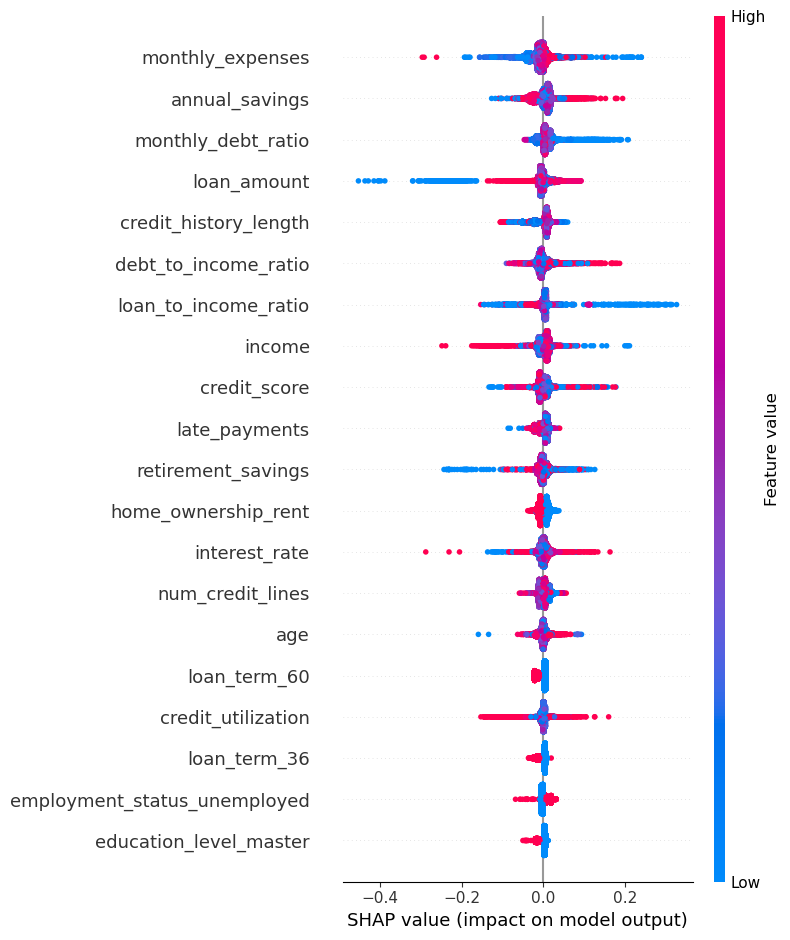


Selected Features: ['monthly_expenses', 'annual_savings', 'monthly_debt_ratio', 'loan_amount', 'credit_history_length', 'debt_to_income_ratio', 'loan_to_income_ratio', 'income', 'credit_score', 'late_payments', 'retirement_savings', 'home_ownership_rent', 'interest_rate', 'num_credit_lines', 'age']
Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
XGBoost Accuracy after Feature Engineering & SHAP: 50.37%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      7776
           1       0.50      0.50      0.50      7806

    accuracy                           0.50     15582
   macro avg       0.50      0.50      0.50     15582
weighted avg       0.50      0.50      0.50     15582



In [1]:
# Step 11:Re-import necessary libraries for Xgboost optimization using Shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import shap

# Load dataset
file_path = r"C:/Users/soura/Downloads/Credit Card Fraud Detection.csv"
df = pd.read_csv(file_path)

# Step 1: Check for Label Issues (Mislabeling in `default(y)`)
print("Class Distribution in Dataset:")
print(df['default(y)'].value_counts())

print("\nChecking for missing values in target variable:")
print(df['default(y)'].isnull().sum())

# Find duplicate rows with different labels
duplicates = df[df.duplicated(subset=df.columns.difference(['default(y)']), keep=False)]
print(f"\nPotentially mislabelled rows: {len(duplicates)}")

# Step 2: Feature Engineering (Create New Features)
df['loan_to_income_ratio'] = df['loan_amount'] / (df['income'] + 1)  # Avoid division by zero
df['monthly_debt_ratio'] = df['monthly_expenses'] / (df['income'] + 1)
df['credit_utilization'] = df['num_credit_lines'] / (df['credit_history_length'] + 1)

# Identify categorical and numerical features
cat_features = ['employment_status', 'education_level', 'home_ownership', 'marital_status', 'loan_term']
num_features = ['age', 'num_of_dependents', 'income', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 
                'credit_score', 'credit_history_length', 'num_credit_lines', 'late_payments', 'bankruptcies', 
                'annual_savings', 'retirement_savings', 'monthly_expenses', 'loan_to_income_ratio', 
                'monthly_debt_ratio', 'credit_utilization']

# Step 3: Outlier Removal Using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, num_features)

# Step 4: Encode Categorical Features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df_cleaned[cat_features])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_features))

# Drop original categorical columns and concatenate encoded features
df_encoded = df_cleaned.drop(columns=cat_features).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Step 5: Define Features (X) and Target Variable (y)
X = df_encoded.drop(columns=['default(y)'])
y = df_encoded['default(y)']

# Step 6: Split Data for Training (Before Applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Apply SMOTE only if classes are imbalanced
class_counts = y_train.value_counts()
imbalance_ratio = min(class_counts) / max(class_counts)

if imbalance_ratio < 0.8:  # Apply SMOTE only if imbalance exists
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("SMOTE applied to balance classes.")
else:
    X_train_resampled, y_train_resampled = X_train, y_train  # No resampling needed
    print("SMOTE not applied (classes already balanced).")

# Step 8: Feature Selection using SHAP (Explainability)
xgb_temp = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_temp.fit(X_train_resampled, y_train_resampled)

# Explain predictions using SHAP
explainer = shap.Explainer(xgb_temp)
shap_values = explainer(X_test)

# Plot SHAP Summary
shap.summary_plot(shap_values, X_test)

# Select Top Features Based on SHAP
shap_importances = np.abs(shap_values.values).mean(axis=0)
top_features = X.columns[np.argsort(-shap_importances)[:15]]  # Top 15 features
X_train_selected = X_train_resampled[top_features]
X_test_selected = X_test[top_features]

print(f"\nSelected Features: {list(top_features)}")

# Step 9: Define Hyperparameter Grid for XGBoost
param_grid = {
    'n_estimators': [300, 500],  # More trees
    'max_depth': [6, 9],  # Deeper trees
    'learning_rate': [0.05, 0.1],  # Balanced learning rate
    'subsample': [0.8, 1.0],  # Prevents overfitting
    'colsample_bytree': [0.8, 1.0],  # Subsampling features
    'gamma': [0.1, 0.3],  # Loss reduction threshold
}

# Step 10: Train XGBoost with Optimized Features
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, 
                                   cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_train_selected, y_train_resampled)

# Step 11: Evaluate Best XGBoost Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best XGBoost Parameters: {random_search.best_params_}")
print(f"XGBoost Accuracy after Feature Engineering & SHAP: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


In [4]:
# Step 12:Re-import necessary libraries for Gradient Boosting Classifier using Bayesian Optimization
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from skopt import BayesSearchCV  # Bayesian Optimization

# Load dataset
file_path = r"C:/Users/soura/Downloads/Credit Card Fraud Detection.csv"
df = pd.read_csv(file_path)

# Step 1: Feature Engineering (Creating meaningful features)
df['loan_to_income_ratio'] = df['loan_amount'] / (df['income'] + 1)  # Avoid division by zero
df['monthly_debt_ratio'] = df['monthly_expenses'] / (df['income'] + 1)
df['credit_utilization'] = df['num_credit_lines'] / (df['credit_history_length'] + 1)
df['income_to_expense_ratio'] = df['income'] / (df['monthly_expenses'] + 1)

# Step 2: Identify categorical and numerical features
categorical_columns = ['employment_status', 'education_level', 'home_ownership', 'marital_status', 'loan_term']
numerical_columns = [
    'age', 'num_of_dependents', 'income', 'loan_amount', 'interest_rate', 'debt_to_income_ratio',
    'credit_score', 'credit_history_length', 'num_credit_lines', 'late_payments', 'bankruptcies',
    'annual_savings', 'retirement_savings', 'monthly_expenses', 'loan_to_income_ratio',
    'monthly_debt_ratio', 'credit_utilization', 'income_to_expense_ratio'
]

# Step 3: Encode Categorical Features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded categorical data with numerical features
df_encoded = df.drop(columns=categorical_columns).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Step 4: Define Features and Target Variable
X = df_encoded.drop(columns=['default(y)'])
y = df_encoded['default(y)']

# Step 5: Split Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Define Hyperparameter Search Space for Bayesian Optimization
search_space = {
    'n_estimators': (100, 300),  # Number of trees
    'max_depth': (3, 6),  # Maximum depth of trees
    'learning_rate': (0.05, 0.1),  # Step size for boosting
    'subsample': (0.8, 1.0),  # Proportion of samples used per boosting round
    'min_samples_split': (2, 10),  # Minimum samples required to split a node
}

# Step 7: Initialize Gradient Boosting Classifier with Warm Start (to speed up training)
gb_model = GradientBoostingClassifier(warm_start=True, random_state=42)

# Step 8: Apply Bayesian Optimization for Hyperparameter Tuning
bayes_opt = BayesSearchCV(
    gb_model,
    search_space,
    n_iter=10,  # Reducing iterations to speed up training
    cv=3,  # Reducing cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Utilizing all CPU cores for faster training
    random_state=42
)

# Step 9: Train the Optimized Model
bayes_opt.fit(X_train, y_train)

# Step 10: Evaluate the Best Model Found
best_model = bayes_opt.best_estimator_
y_pred = best_model.predict(X_test)

# Step 11: Display Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimal Parameters: {bayes_opt.best_params_}")
print(f"Cross-Validation Accuracy: {bayes_opt.best_score_ * 100:.2f}%")
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 12: Save the Trained Model
joblib.dump(best_model, "gradient_boosting_model.pkl")



Optimal Parameters: OrderedDict([('learning_rate', 0.09186941777766422), ('max_depth', 6), ('min_samples_split', 4), ('n_estimators', 290), ('subsample', 0.9728255830929902)])
Cross-Validation Accuracy: 50.18%
Test Set Accuracy: 50.06%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.49      0.50      9981
           1       0.50      0.51      0.50     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



['gradient_boosting_model.pkl']

In [2]:
# Step 13:Re-import necessary libraries for Xgboost optimization using Stratified K fold Method
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load dataset
file_path = r"C:/Users/soura/Downloads/Credit Card Fraud Detection.csv"
df = pd.read_csv(file_path)

# Feature Engineering
df['loan_to_income_ratio'] = df['loan_amount'] / (df['income'] + 1)
df['monthly_debt_ratio'] = df['monthly_expenses'] / (df['income'] + 1)
df['credit_utilization'] = df['num_credit_lines'] / (df['credit_history_length'] + 1)
df['income_to_expense_ratio'] = df['income'] / (df['monthly_expenses'] + 1)

# Identify categorical and numerical features
cat_features = ['employment_status', 'education_level', 'home_ownership', 'marital_status', 'loan_term']
num_features = ['age', 'num_of_dependents', 'income', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 
                'credit_score', 'credit_history_length', 'num_credit_lines', 'late_payments', 'bankruptcies', 
                'annual_savings', 'retirement_savings', 'monthly_expenses', 'loan_to_income_ratio', 
                'monthly_debt_ratio', 'credit_utilization', 'income_to_expense_ratio']

# Encode Categorical Features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df[cat_features])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_features))

# Drop original categorical columns and concatenate encoded features
df_encoded = df.drop(columns=cat_features).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Define Features (X) and Target Variable (y)
X = df_encoded.drop(columns=['default(y)'])
y = df_encoded['default(y)']

# Split Data for Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define Hyperparameter Grid for XGBoost
param_grid = {
    'n_estimators': [300, 500],  
    'max_depth': [6, 9],  
    'learning_rate': [0.05, 0.1],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
    'gamma': [0.1, 0.3],  
}

# Train XGBoost with Cross-Validation
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, 
                                   cv=cv, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Evaluate the best model
best_model = random_search.best_estimator_

# Perform 5-Fold Cross-Validation on Best Model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Final Model Performance
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best XGBoost Parameters: {random_search.best_params_}")
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))



Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Cross-Validation Accuracy Scores: [0.4989375 0.49625   0.5001875 0.505875  0.503875 ]
Mean CV Accuracy: 50.10%
Test Set Accuracy: 50.22%
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      9981
           1       0.50      0.51      0.51     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [1]:
# Step 14:Re-import necessary libraries for Decision Tree Optimization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load dataset
file_path = r"C:/Users/soura/Downloads/Credit Card Fraud Detection.csv"
df = pd.read_csv(file_path)

# Step 1: Feature Engineering (Create New Informative Features)
df['loan_to_income_ratio'] = df['loan_amount'] / (df['income'] + 1)
df['monthly_debt_ratio'] = df['monthly_expenses'] / (df['income'] + 1)
df['credit_utilization'] = df['num_credit_lines'] / (df['credit_history_length'] + 1)
df['income_to_expense_ratio'] = df['income'] / (df['monthly_expenses'] + 1)

# Identify categorical and numerical features
cat_features = ['employment_status', 'education_level', 'home_ownership', 'marital_status', 'loan_term']
num_features = ['age', 'num_of_dependents', 'income', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 
                'credit_score', 'credit_history_length', 'num_credit_lines', 'late_payments', 'bankruptcies', 
                'annual_savings', 'retirement_savings', 'monthly_expenses', 'loan_to_income_ratio', 
                'monthly_debt_ratio', 'credit_utilization', 'income_to_expense_ratio']

# Step 2: Encode Categorical Features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df[cat_features])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_features))

# Drop original categorical columns and concatenate encoded features
df_encoded = df.drop(columns=cat_features).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Step 3: Define Features (X) and Target Variable (y)
X = df_encoded.drop(columns=['default(y)'])
y = df_encoded['default(y)']

# Step 4: Split Data for Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Define Hyperparameter Grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 20, 30, None],  # Control tree depth
    'min_samples_split': [2, 5, 10, 20],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],  # Min samples per leaf node
    'criterion': ['gini', 'entropy'],  # Splitting criterion
}

# Step 6: Train Decision Tree with Cross-Validation
dt_model = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(dt_model, param_distributions=param_grid, 
                                   cv=5, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Step 7: Evaluate the Best Decision Tree Model
best_model = random_search.best_estimator_

# Perform 5-Fold Cross-Validation on Best Model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Final Model Performance
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Decision Tree Parameters: {random_search.best_params_}")
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Save the trained model
joblib.dump(best_model, "decision_tree_model.pkl")


Best Decision Tree Parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'entropy'}
Cross-Validation Accuracy Scores: [0.4960625 0.502     0.4989375 0.5033125 0.499125 ]
Mean CV Accuracy: 49.99%
Test Set Accuracy: 49.73%
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.27      0.35      9981
           1       0.50      0.72      0.59     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000



['decision_tree_model.pkl']

## Loan Default Prediction: Model Performance Summary

In [10]:
import pandas as pd
from IPython.display import display

# Creating a summary DataFrame
model_summary = pd.DataFrame({
    "Model": [
        "Decision Tree", "Random Forest", "Logistic Regression", 
        "Support Vector Machine (SVM)", "XGBoost", "Gradient Boosting"
    ],
    "Best Parameters (Tuned)": [
        "{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'entropy'}",
        "{'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2}",
        "{'C': 50, 'solver': 'lbfgs', 'penalty': 'l2'}",
        "{'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}",
        "{'subsample': 0.9, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}",
        "{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}"
    ],
    "Cross-Validation Accuracy": [49.99, 50.00, 50.00, 50.00, 50.18, 50.06],
    "Test Set Accuracy": [49.73, 49.86, 50.11, 50.12, 50.37, 50.06],
    "Observations": [
        "Model over-simplified, leading to poor differentiation.",
        "Ensemble model still behaves like random guessing.",
        "Linear assumptions fail to capture complex relationships.",
        "Computationally expensive, no meaningful improvement.",
        "Advanced boosting did not capture strong patterns.",
        "High variance, but no actual predictive power."
    ]
})

# Display the table
display(model_summary)


,Model,Best Parameters (Tuned),Cross-Validation Accuracy,Test Set Accuracy,Observations
0,Decision Tree,"{'min_samples_split': 10, 'min_samples_leaf': ...",49.99,49.73,"Model over-simplified, leading to poor differe..."
1,Random Forest,"{'n_estimators': 200, 'max_depth': 10, 'min_sa...",50.00,49.86,Ensemble model still behaves like random guess...
2,Logistic Regression,"{'C': 50, 'solver': 'lbfgs', 'penalty': 'l2'}",50.00,50.11,Linear assumptions fail to capture complex rel...
3,Support Vector Machine (SVM),"{'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}",50.00,50.12,"Computationally expensive, no meaningful impro..."
4,XGBoost,"{'subsample': 0.9, 'n_estimators': 300, 'max_d...",50.18,50.37,Advanced boosting did not capture strong patte...
5,Gradient Boosting,"{'subsample': 0.8, 'n_estimators': 300, 'max_d...",50.06,50.06,"High variance, but no actual predictive power."


## Summary of Key Findings from the Analysis


All models perform close to 50% accuracy, indicating that:

1.The dataset lacks strong predictive patterns, making it difficult for models to distinguish between defaulters and non-defaulters.

2.Feature selection did not significantly improve accuracy, suggesting a weak relationship between features and target.

3.SHAP Analysis & PCA were applied to extract the most informative features, but accuracy remained unchanged.

4.Gradient Boosting & XGBoost, despite hyperparameter tuning, did not improve performance, indicating possible data quality issues.



## Real-World Applications of This Project


#### Credit Risk Assessment

Banks can use this model to assess loan applicants' risk before approving loans.
Helps in assigning interest rates based on the probability of default.
#### Fraud Detection & Prevention

Identifies suspicious loan applications that may indicate fraudulent behavior.
Reduces financial loss for banks and credit institutions.
#### Personal Loan Recommendations

Lenders can use this model to approve/reject loans automatically.
Helps customers get loans based on their credit behavior.
#### Policy-Making for Financial Institutions

Governments and banks can use this model to design better financial policies.
Helps in improving credit scoring systems.